In [16]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [17]:
from src.data_analysis import show_random_images, show_missing, plot_categorical_columns, plot_continuous, get_image_statistics_df, plot_image_statistics, calculate_normalization_values
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport

import os

In [18]:
# Set the path to labels or filename
FILE_NAME = 'dataframe_brsetmobile.csv'

In [19]:
df = pd.read_csv(FILE_NAME)

## Create referable DR column   

In [20]:
# Create the referable_dr column in the original dataframe
df['referable_dr'] = 'no'  # Initially set to 'no' for all rows

def calculate_referable_dr(group):
    if 'yes' in group['final_edema'].values:
        return 'yes'
    elif group['final_icdr'].max() > 1:
        return 'yes'
    else:
        return 'no'

# Update referable_dr based on the conditions
for (patient, laterality), group in df.groupby(['patient', 'laterality']):
    if 'yes' in group['final_edema'].values:
        df.loc[group.index, 'referable_dr'] = 'yes'
    elif 'no' in group['final_edema'].values and group['final_icdr'].max() > 1:
        df.loc[group.index, 'referable_dr'] = 'yes'

## Create a subframe with only patients

In [21]:
# Create a sub-dataframe with unique patients
unique_patients_df = df.drop_duplicates(subset='patient')



## EDA 

In [22]:
df.columns

Index(['patient', 'age', 'sex', 'dm_time', 'insulin', 'insulin_time',
       'oraltreatment_dm', 'systemic_hypertension', 'insurance',
       'educational_level', 'alcohol_consumption', 'smoking', 'obesity',
       'vascular_disease', 'acute_myocardial_infarction', 'nephropathy',
       'neuropathy', 'diabetic_foot', 'file', 'laterality', 'final_artifacts',
       'final_quality', 'final_icdr', 'final_edema', 'referable_dr'],
      dtype='object')

17 columns with missing values detected:
dm_time 1.08 % missing values
insulin 0.9299999999999999 % missing values
insulin_time 80.33 % missing values
oraltreatment_dm 0.8500000000000001 % missing values
systemic_hypertension 0.8500000000000001 % missing values
insurance 0.9299999999999999 % missing values
educational_level 1.01 % missing values
alcohol_consumption 1.47 % missing values
smoking 1.7000000000000002 % missing values
obesity 1.47 % missing values
vascular_disease 1.47 % missing values
acute_myocardial_infarction 1.63 % missing values
nephropathy 1.55 % missing values
neuropathy 1.47 % missing values
diabetic_foot 2.09 % missing values
final_icdr 5.42 % missing values
final_edema 5.13 % missing values


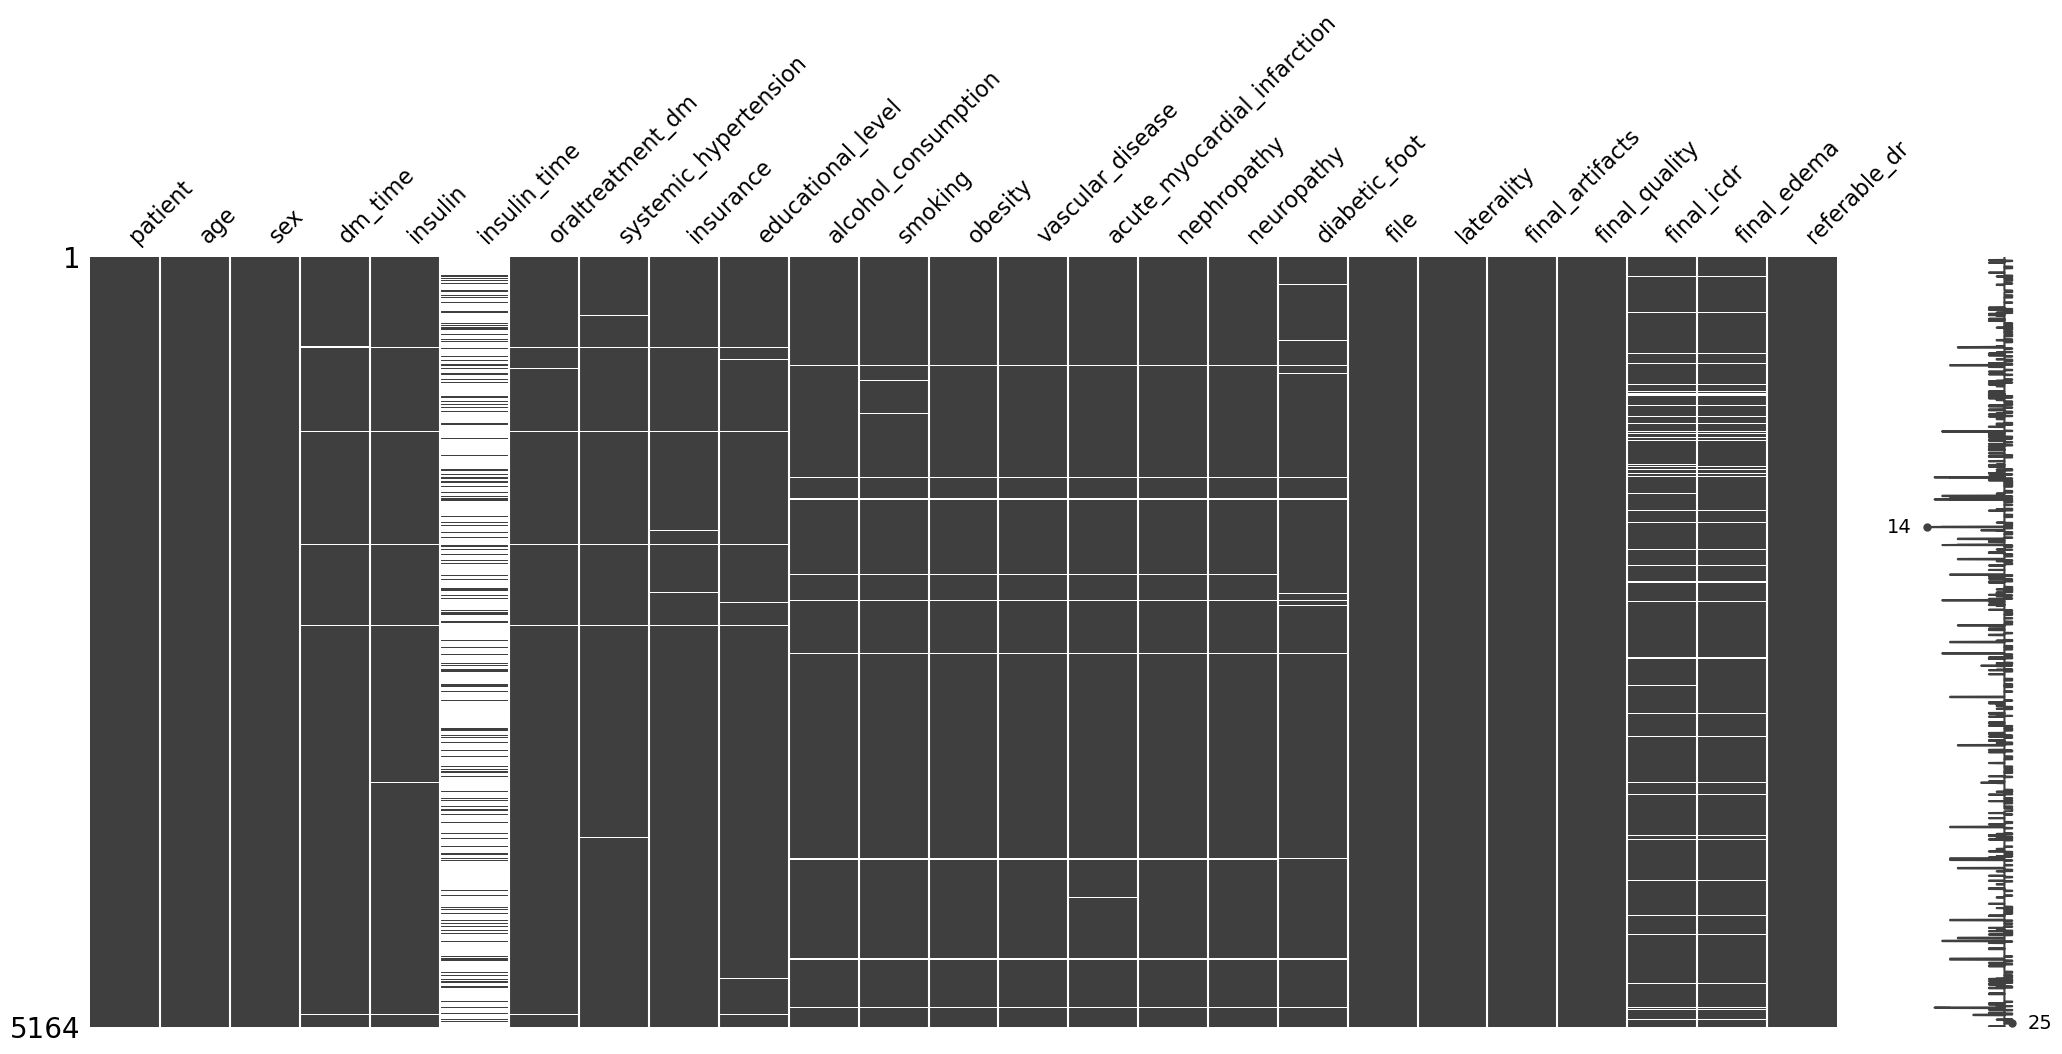

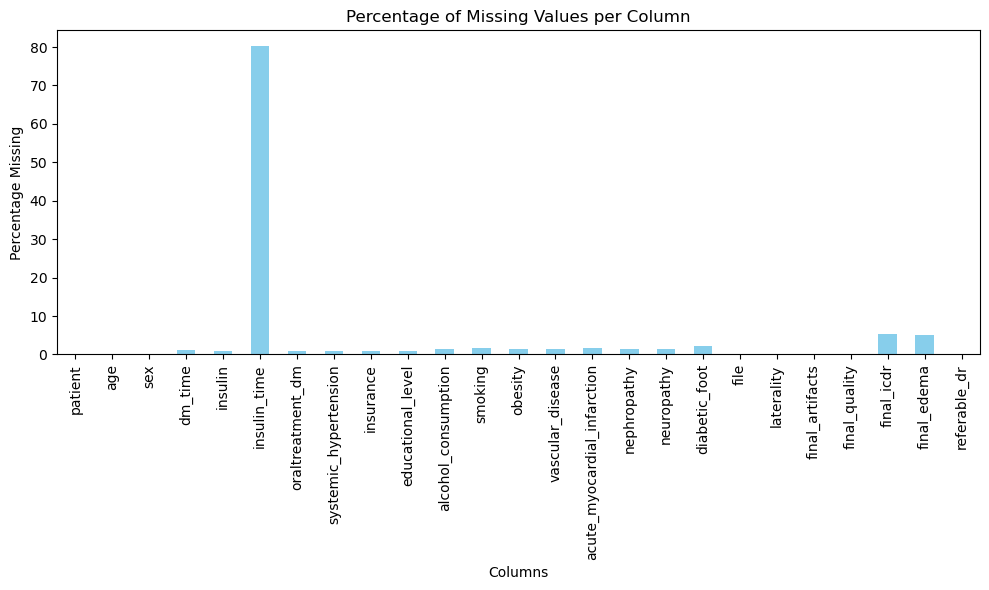

In [23]:
show_missing(df)

In [24]:
unique_patients_df.columns

Index(['patient', 'age', 'sex', 'dm_time', 'insulin', 'insulin_time',
       'oraltreatment_dm', 'systemic_hypertension', 'insurance',
       'educational_level', 'alcohol_consumption', 'smoking', 'obesity',
       'vascular_disease', 'acute_myocardial_infarction', 'nephropathy',
       'neuropathy', 'diabetic_foot', 'file', 'laterality', 'final_artifacts',
       'final_quality', 'final_icdr', 'final_edema', 'referable_dr'],
      dtype='object')

##########################################################################################
########################################  age  ########################################
##########################################################################################
count    1291.000000
mean       61.447715
std        11.637457
min         3.000000
25%        55.000000
50%        63.000000
75%        69.000000
max       110.000000
Name: age, dtype: float64



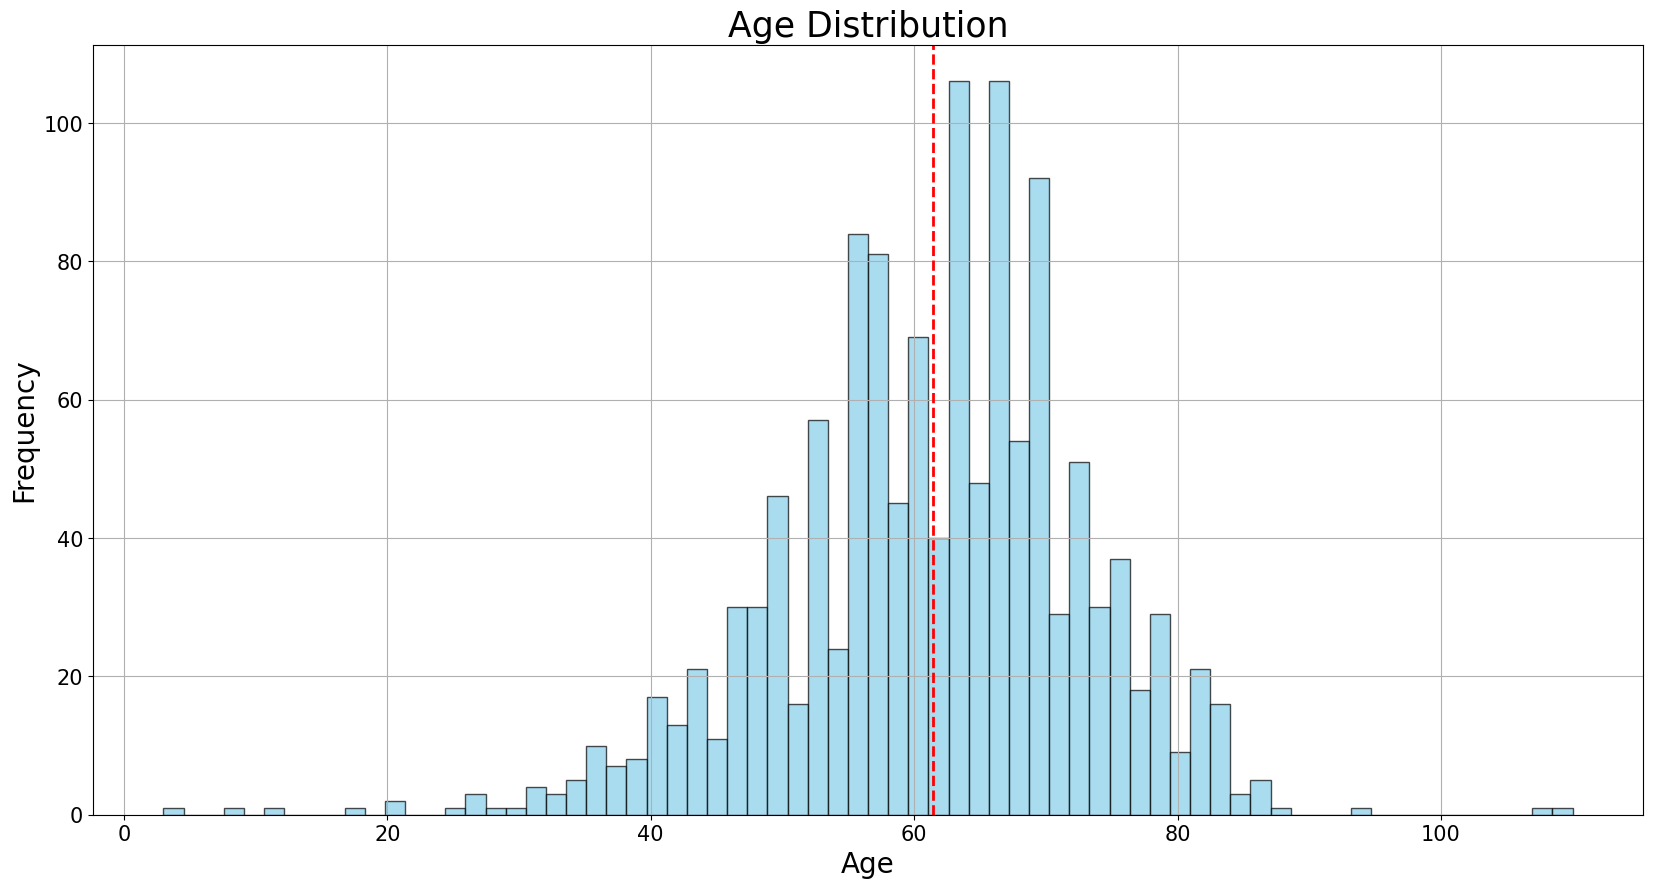

In [25]:
plot_continuous(unique_patients_df, 'age')

##########################################################################################
########################################  dm_time  ########################################
##########################################################################################
count    1277.000000
mean        9.541112
std         8.641823
min         0.000000
25%         3.000000
50%         7.000000
75%        15.000000
max        83.000000
Name: dm_time, dtype: float64



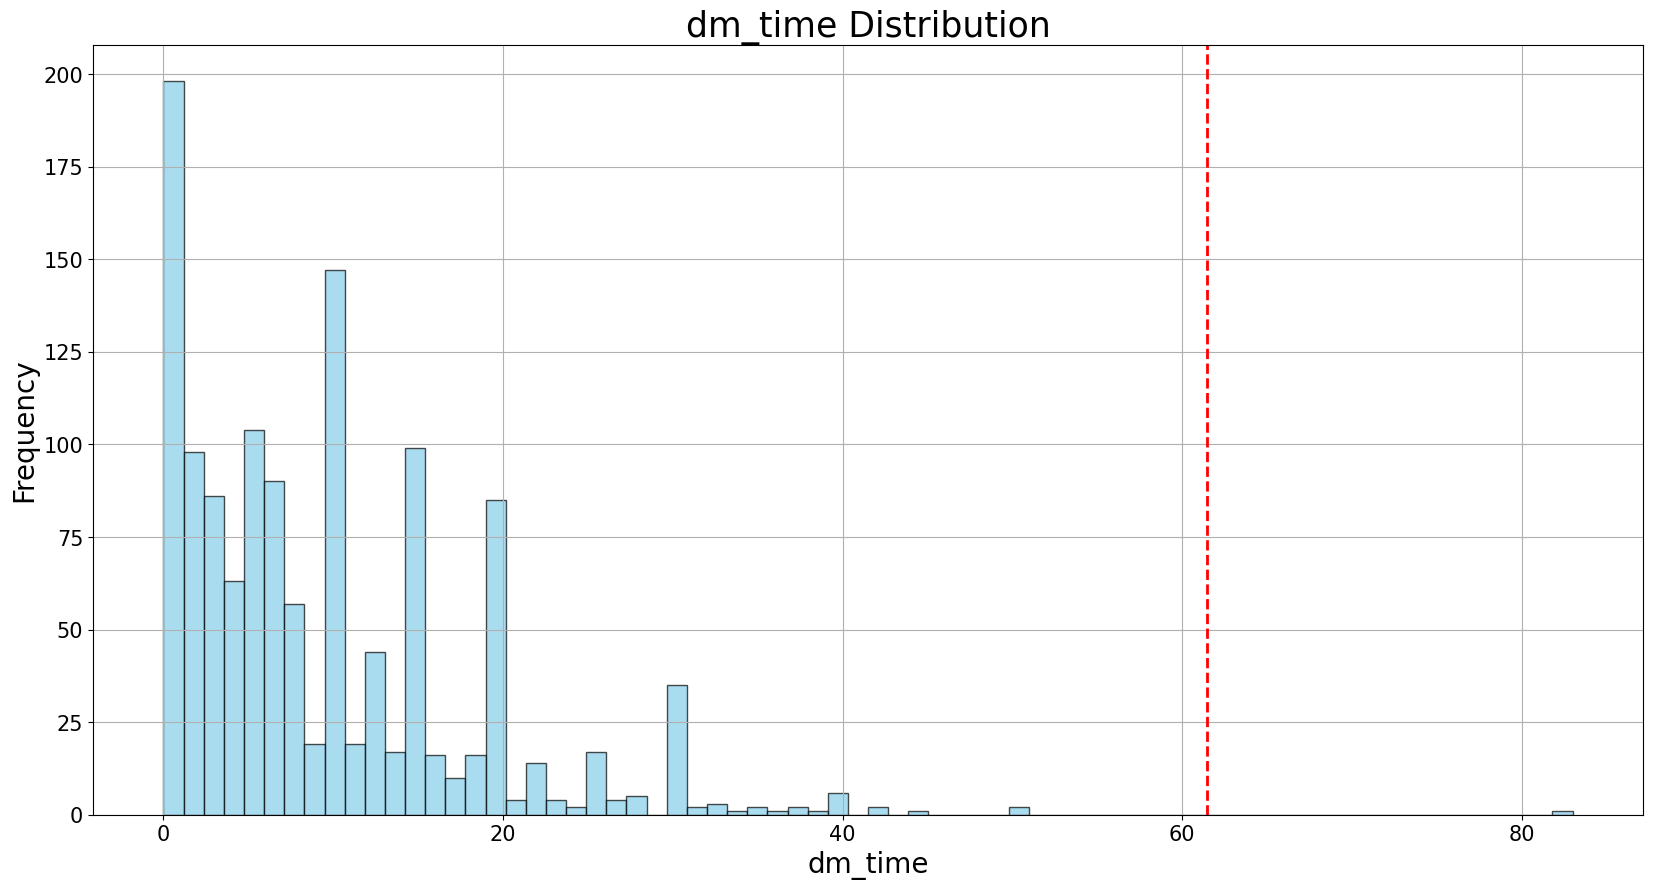

In [26]:
plot_continuous(unique_patients_df, 'dm_time')

##########################################################################################
########################################  sex  ########################################
##########################################################################################
0    0.650658
1    0.349342
Name: sex, dtype: float64



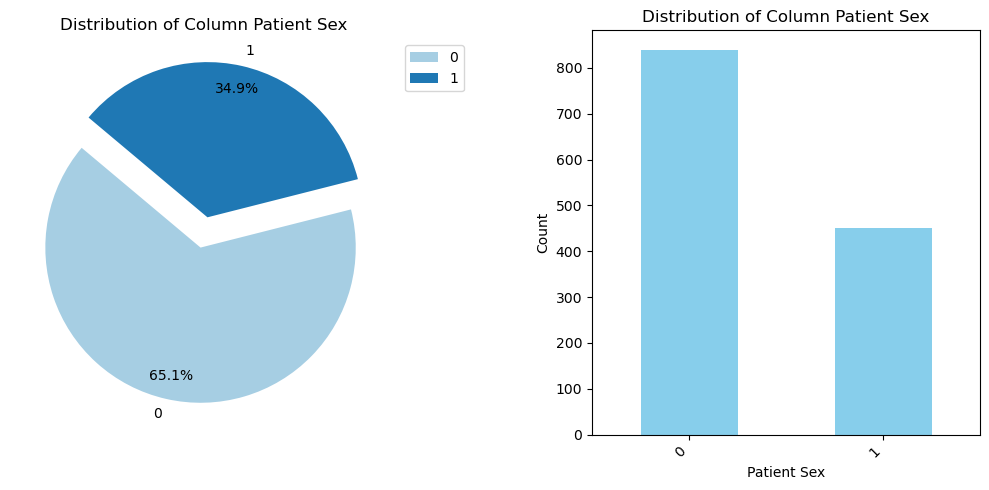

##########################################################################################
########################################  insulin  ########################################
##########################################################################################
0.0    0.792025
1.0    0.207975
Name: insulin, dtype: float64



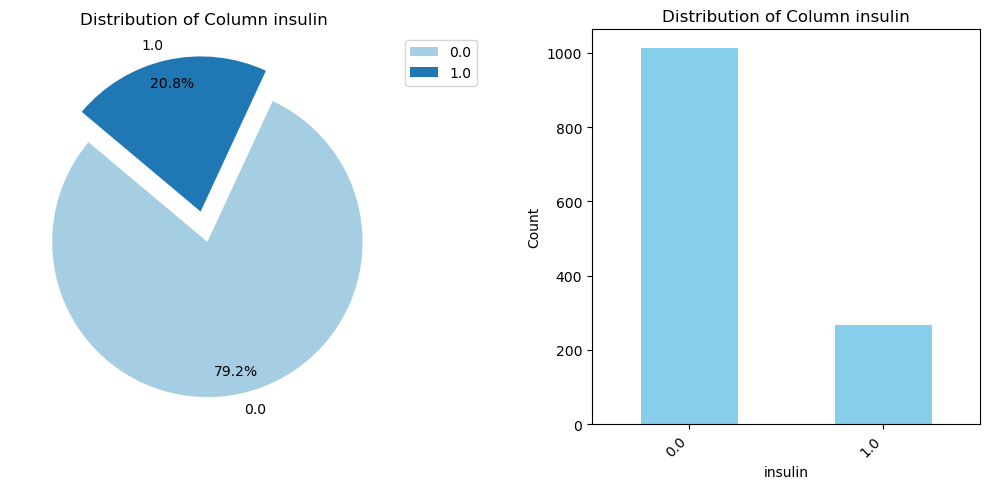

##########################################################################################
########################################  oraltreatment_dm  ########################################
##########################################################################################
1.0    0.846094
0.0    0.153906
Name: oraltreatment_dm, dtype: float64



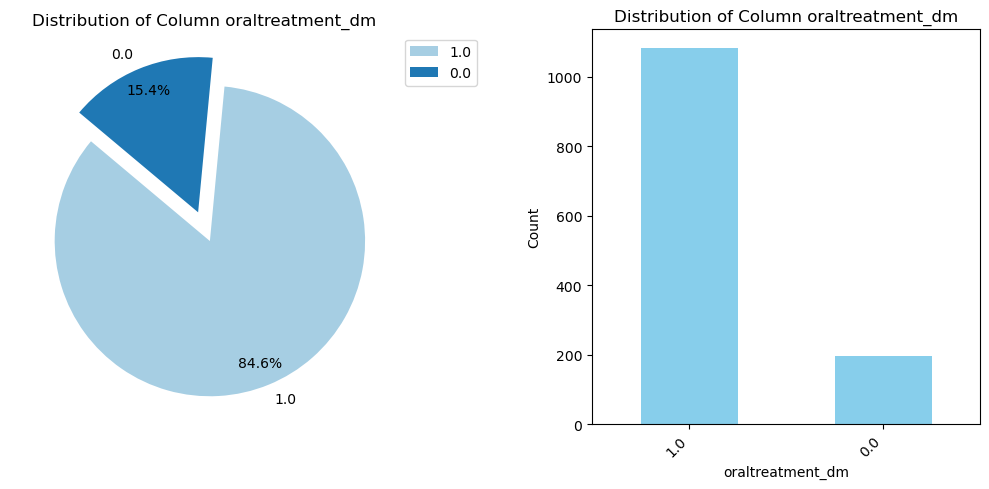

##########################################################################################
########################################  systemic_hypertension  ########################################
##########################################################################################
1.0    0.714063
0.0    0.285938
Name: systemic_hypertension, dtype: float64



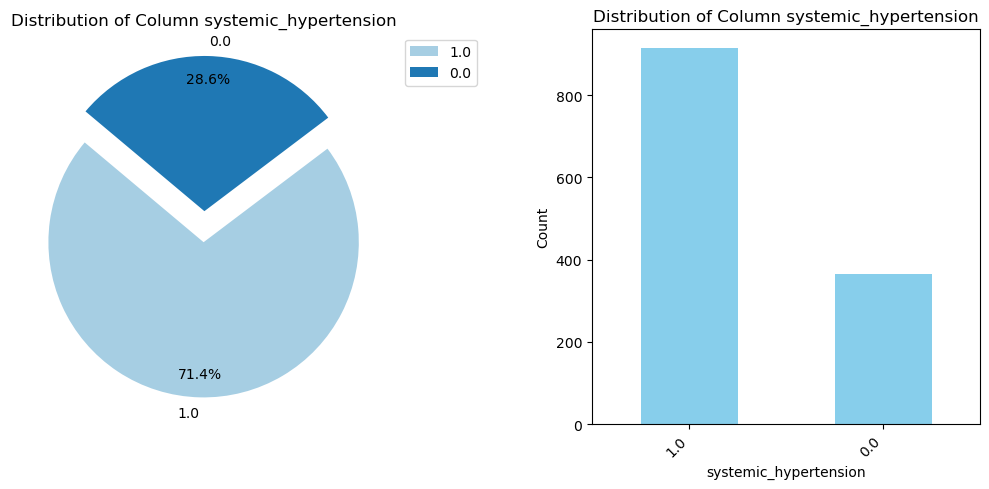

##########################################################################################
########################################  insurance  ########################################
##########################################################################################
0.0    0.922596
1.0    0.077404
Name: insurance, dtype: float64



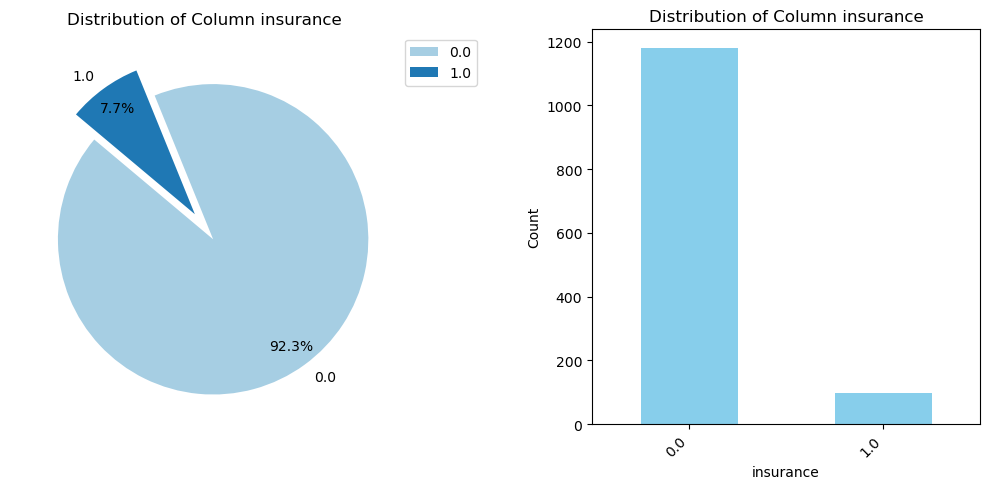

##########################################################################################
########################################  educational_level  ########################################
##########################################################################################
2.0    0.421753
5.0    0.193271
1.0    0.137715
4.0    0.093897
3.0    0.090767
7.0    0.046166
6.0    0.016432
Name: educational_level, dtype: float64



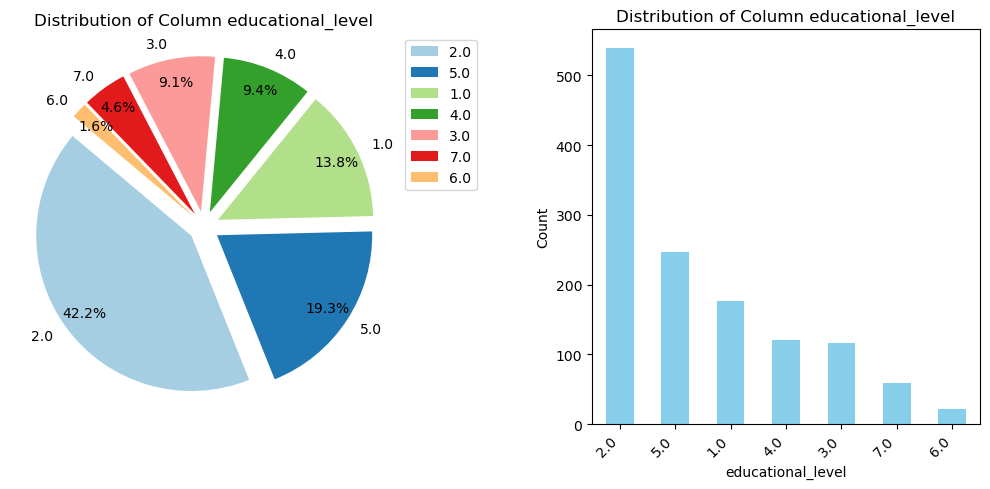

##########################################################################################
########################################  alcohol_consumption  ########################################
##########################################################################################
0.0    0.860063
1.0    0.139937
Name: alcohol_consumption, dtype: float64



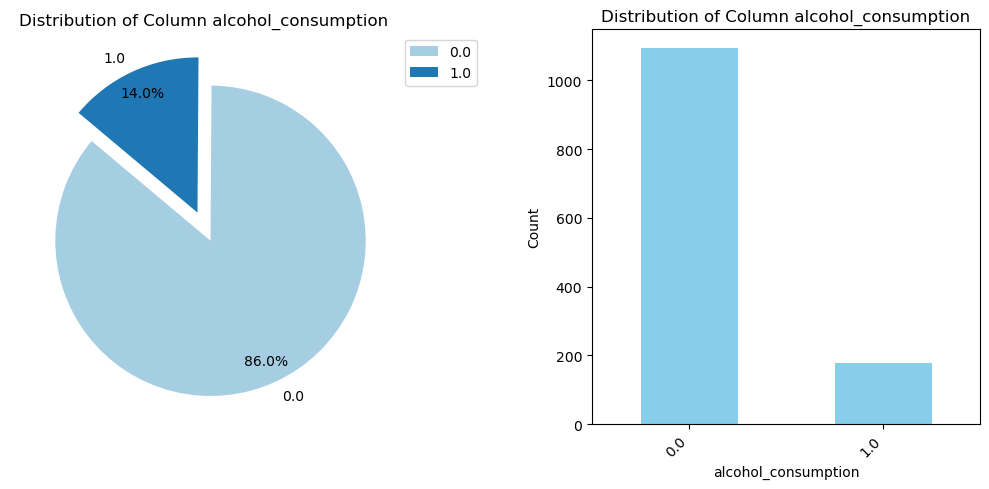

##########################################################################################
########################################  smoking  ########################################
##########################################################################################
0.0    0.93617
1.0    0.06383
Name: smoking, dtype: float64



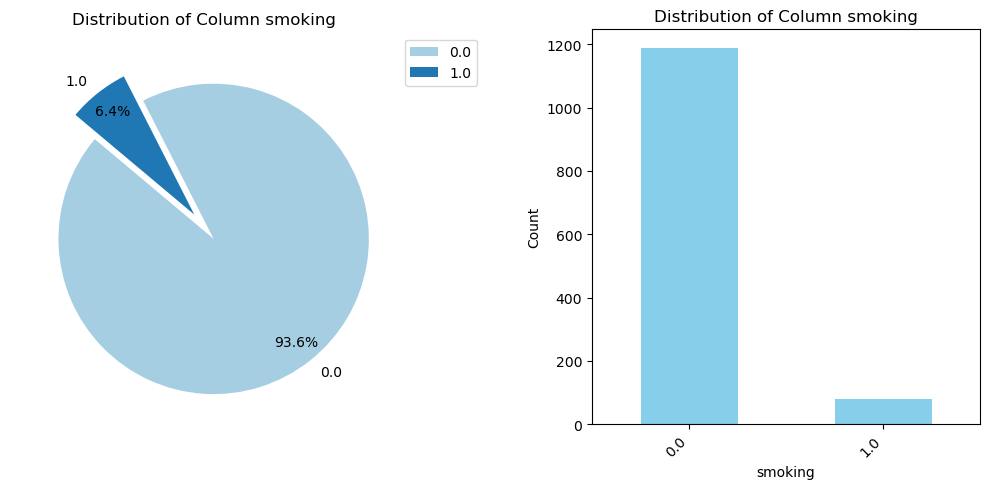

##########################################################################################
########################################  obesity  ########################################
##########################################################################################
0.0    0.919811
1.0    0.080189
Name: obesity, dtype: float64



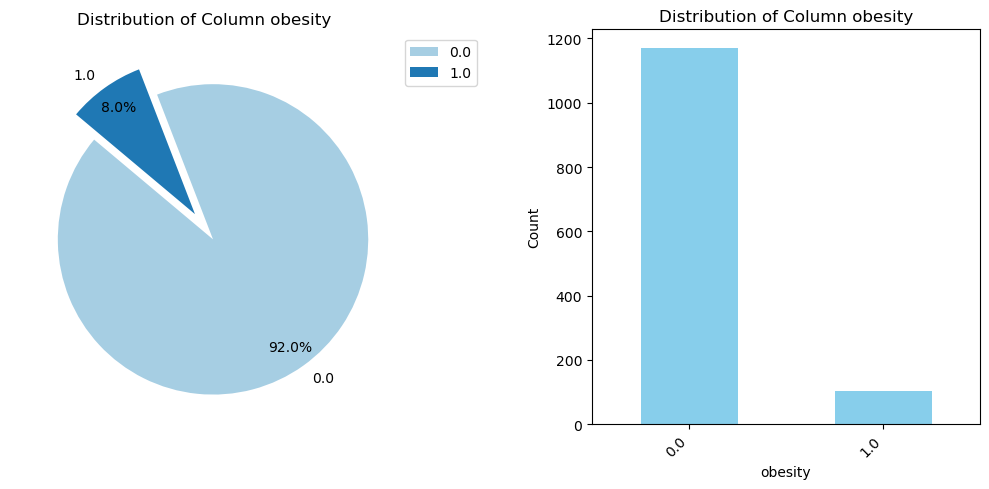

##########################################################################################
########################################  vascular_disease  ########################################
##########################################################################################
0.0    0.829403
1.0    0.170597
Name: vascular_disease, dtype: float64



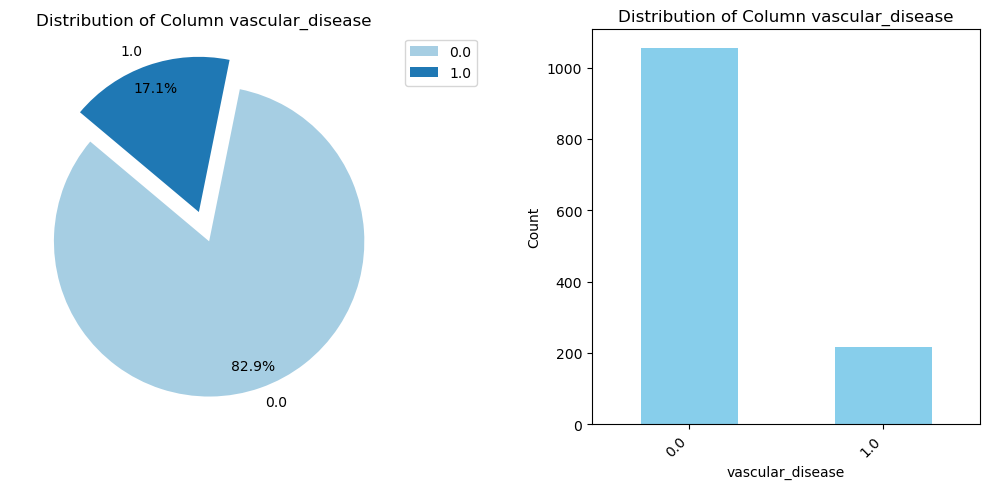

##########################################################################################
########################################  acute_myocardial_infarction  ########################################
##########################################################################################
0.0    0.922835
1.0    0.077165
Name: acute_myocardial_infarction, dtype: float64



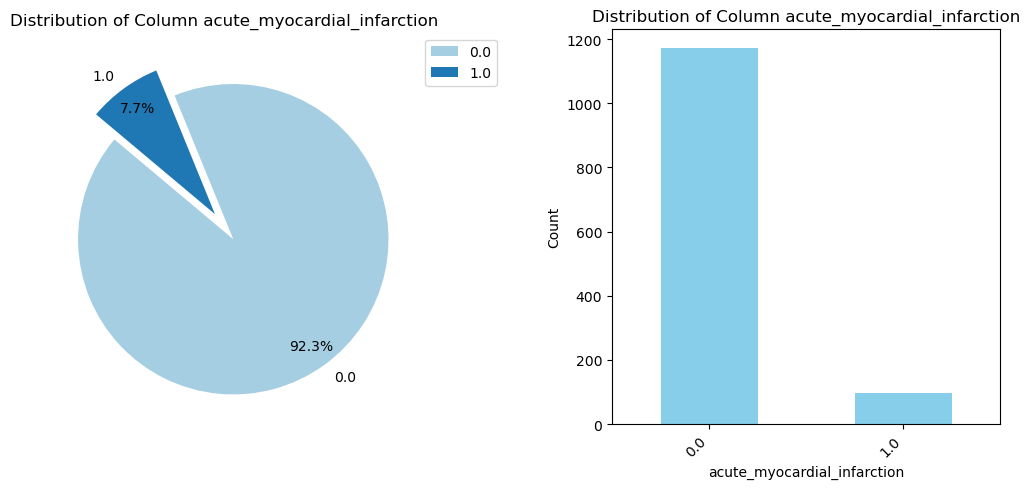

##########################################################################################
########################################  nephropathy  ########################################
##########################################################################################
0.0    0.963808
1.0    0.036192
Name: nephropathy, dtype: float64



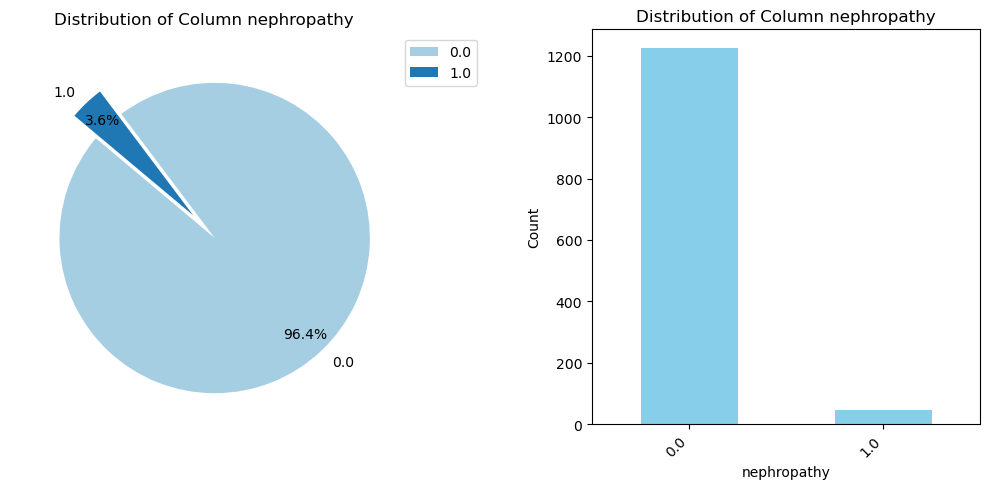

##########################################################################################
########################################  neuropathy  ########################################
##########################################################################################
0.0    0.956761
1.0    0.043239
Name: neuropathy, dtype: float64



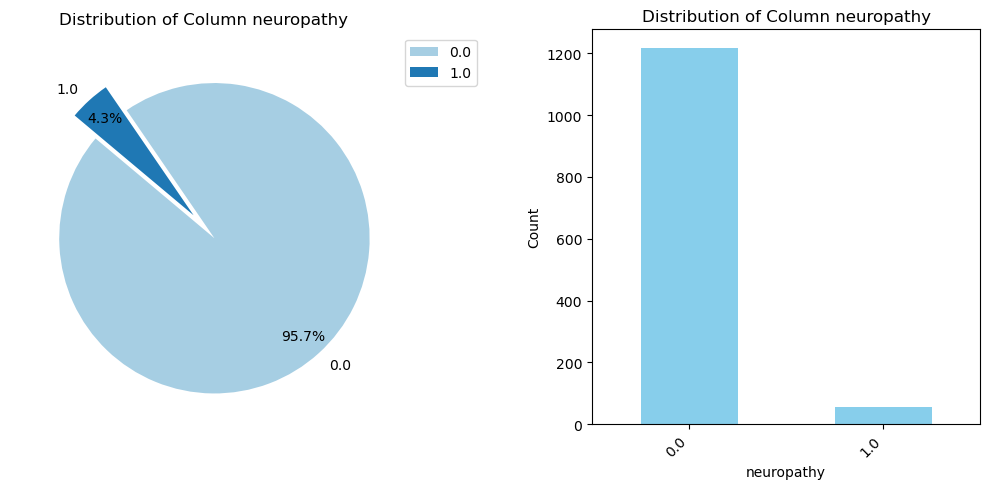

##########################################################################################
########################################  diabetic_foot  ########################################
##########################################################################################
0.0    0.863133
1.0    0.136867
Name: diabetic_foot, dtype: float64



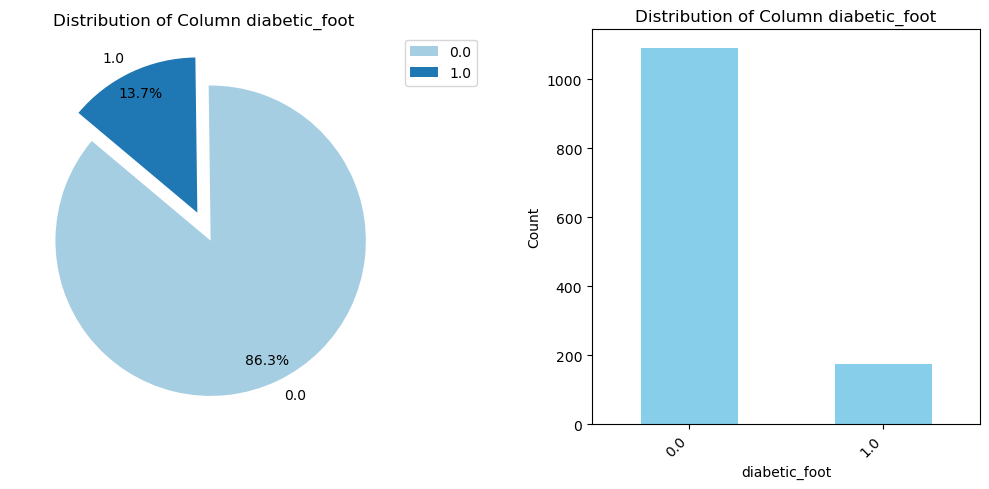

In [27]:
#Patient level analysis
categorical_columns = ['sex', 'insulin', 'oraltreatment_dm',
       'systemic_hypertension', 'insurance', 'educational_level',
       'alcohol_consumption', 'smoking', 'obesity', 'vascular_disease',
       'acute_myocardial_infarction', 'nephropathy', 'neuropathy',
       'diabetic_foot']
plot_categorical_columns(unique_patients_df, categorical_columns=categorical_columns, save=True)

##########################################################################################
########################################  laterality  ########################################
##########################################################################################
left     0.500387
right    0.499613
Name: laterality, dtype: float64



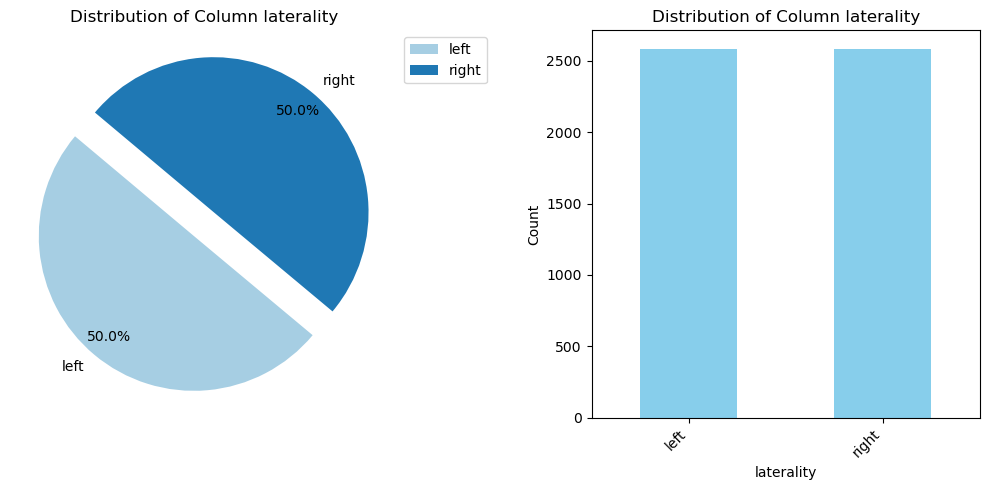

##########################################################################################
########################################  final_artifacts  ########################################
##########################################################################################
yes    0.827266
no     0.172734
Name: final_artifacts, dtype: float64



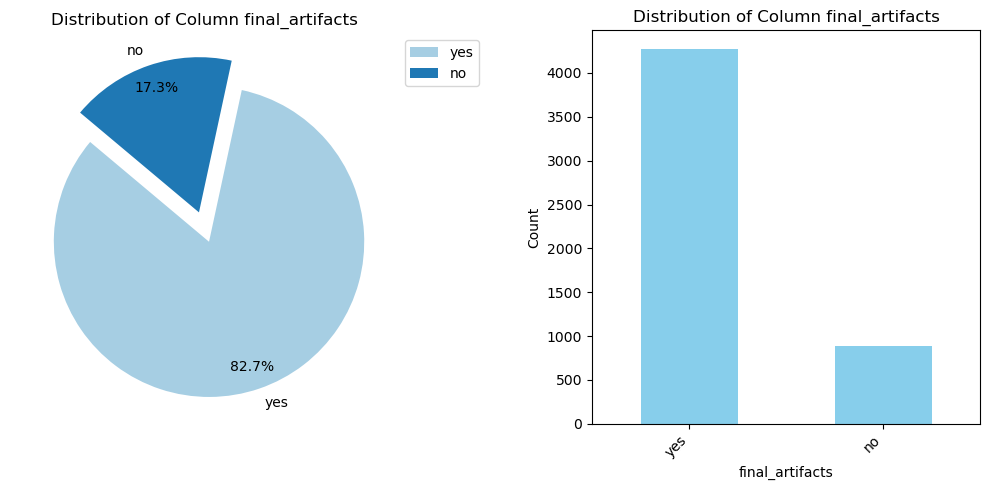

##########################################################################################
########################################  final_quality  ########################################
##########################################################################################
yes    0.943455
no     0.056545
Name: final_quality, dtype: float64



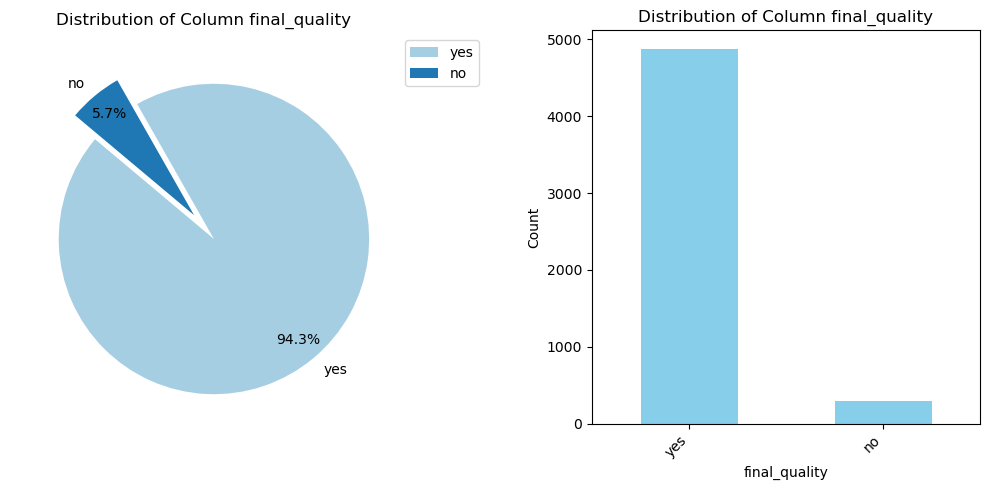

##########################################################################################
########################################  final_icdr  ########################################
##########################################################################################
0.0    0.767813
2.0    0.116298
1.0    0.055692
4.0    0.043407
3.0    0.016790
Name: final_icdr, dtype: float64



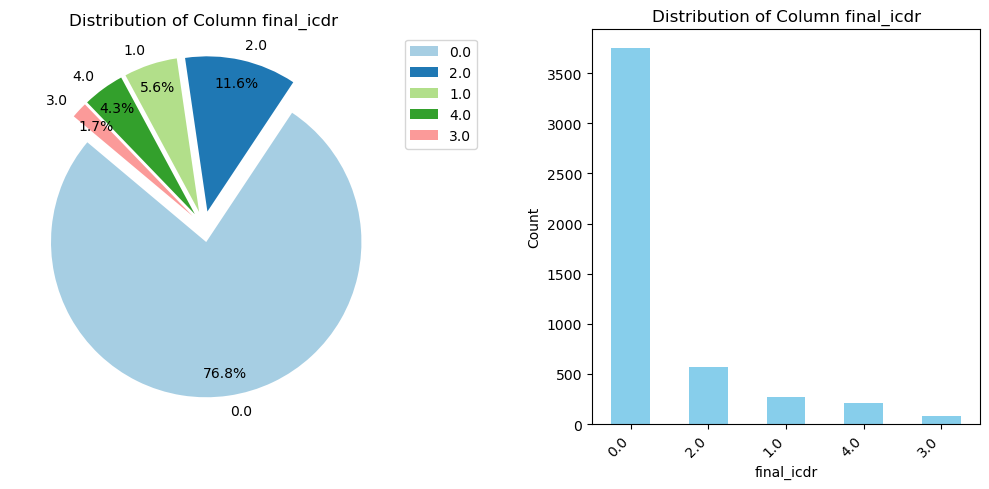

##########################################################################################
########################################  final_edema  ########################################
##########################################################################################
no     0.912839
yes    0.087161
Name: final_edema, dtype: float64



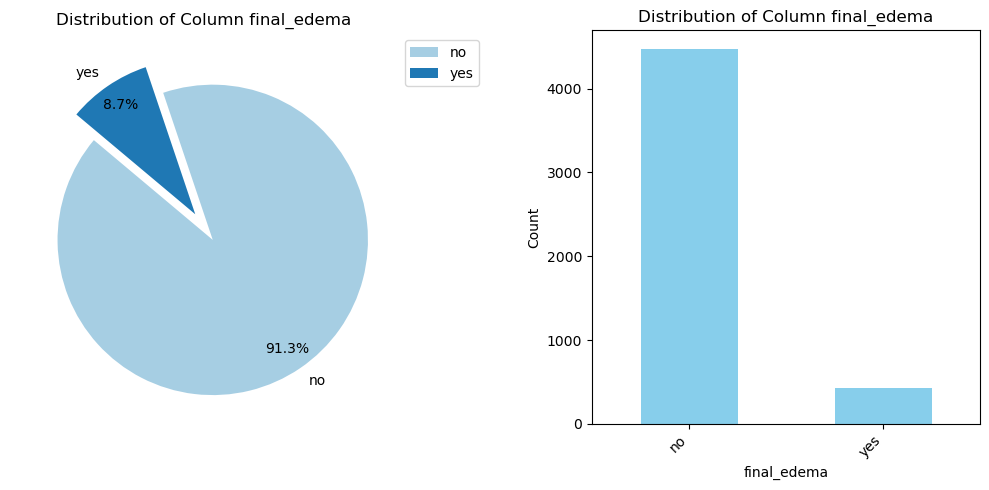

##########################################################################################
########################################  referable_dr  ########################################
##########################################################################################
no     0.806933
yes    0.193067
Name: referable_dr, dtype: float64



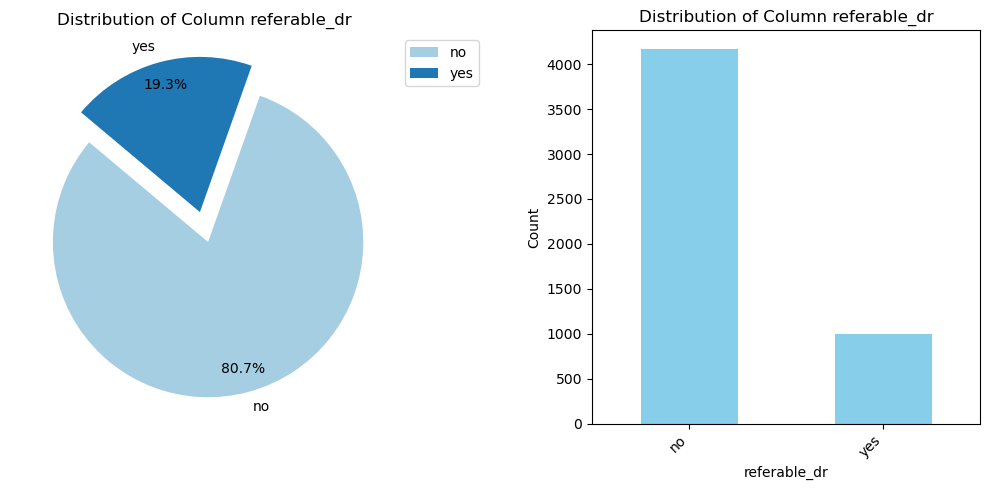

In [31]:
#Image level analysis

categorical_columns = ['laterality', 'final_artifacts',
       'final_quality', 'final_icdr', 'final_edema', 'referable_dr']
plot_categorical_columns(df, categorical_columns=categorical_columns, save=True)

In [29]:
table_name = 'Report mBRSET'
out_dir = 'Profile'

# Data profiling:
# You can alsoset minimal=True for a summary:
profile = ProfileReport(df, title=f'{table_name}')

profile.to_notebook_iframe()

# save the profile:
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

profile.to_file(f'{out_dir}/{table_name}.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/luisnakayama/miniforge3/lib/python3.9/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]